In [8]:
FILE_PATH ="cervical-cancer.csv"
DF_EXPORT ="cervical-cancer_part_1.csv"

### load libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

### Read Data


In [10]:
df =pd.read_csv(FILE_PATH)

### show five rows

In [11]:
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


### show dimensions data 

In [12]:
df.shape

(835, 36)

### show information inside data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

### check null value 

In [14]:
df.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

### group by cancer for maximum 

In [15]:
DATA =df.groupby(['Dx:Cancer']).max()
DATA

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
Dx:Cancer,,,,,,,,,,,,,,,,,,,,,
0,84,28.0,32.0,11.0,1.0,34.0,22.0,1.0,30.0,1.0,...,3,22.0,22.0,1,1,1,1,1,1,1
1,52,6.0,22.0,5.0,1.0,37.0,37.0,1.0,16.0,1.0,...,1,16.0,16.0,0,1,1,1,1,1,1


## calculate the correlation 

In [16]:
df_corrolation =df.corr()
df_corrolation["Dx:Cancer"].sort_values(ascending =False).reset_index().head(13)

,index,Dx:Cancer
0,Dx:Cancer,1.000000
1,Dx:HPV,0.886441
2,Dx,0.665423
3,STDs:HPV,0.329675
4,STDs: Time since last diagnosis,0.212983
5,STDs: Time since first diagnosis,0.201319
6,Biopsy,0.162142
7,Schiller,0.158419
8,Hinselmann,0.133550
9,Citology,0.114660


# Data visualization

<AxesSubplot:>

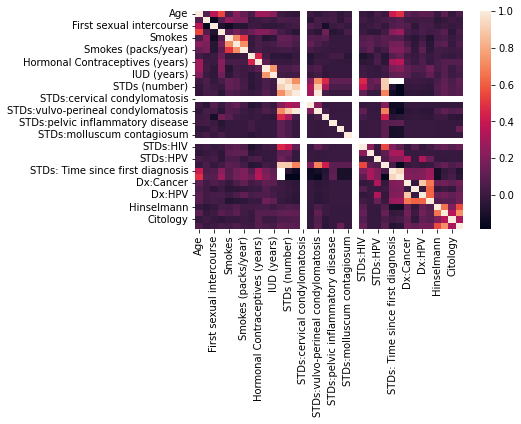

In [17]:
sns.heatmap(df_corrolation)

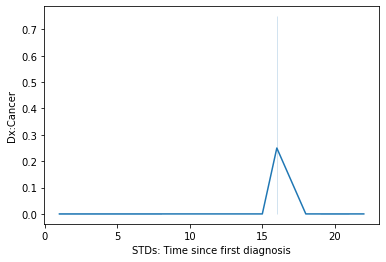

In [18]:
sns.lineplot(df["STDs: Time since first diagnosis"],df["Dx:Cancer"],data=df)
plt.show()

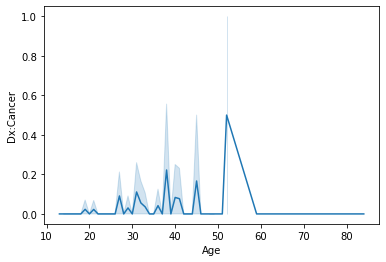

In [19]:
sns.lineplot(df["Age"],df["Dx:Cancer"],data=df)
plt.show()

In [20]:
columns =["Dx:Cancer","Dx:HPV","Dx","STDs:HPV",'STDs: Time since last diagnosis',
         "STDs: Time since first diagnosis","Biopsy","Schiller","Hinselmann","Citology",
         "Smokes (packs/year)","IUD","Age"]

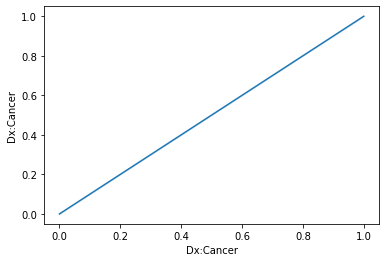

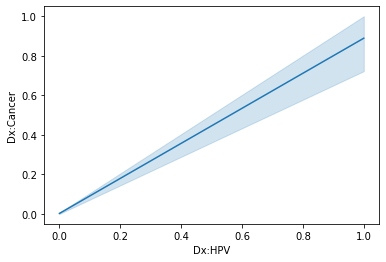

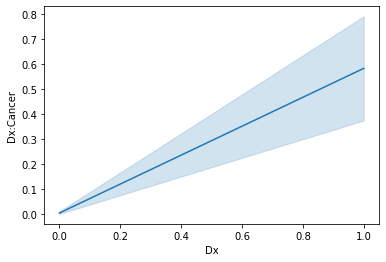

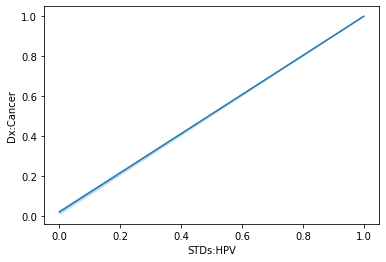

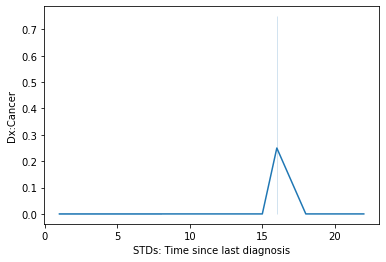

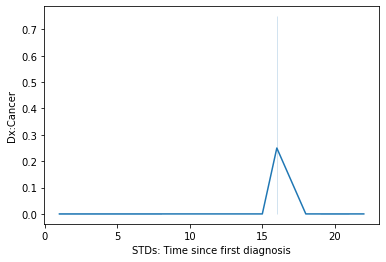

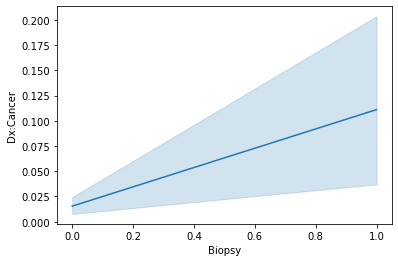

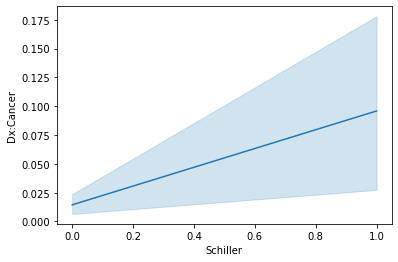

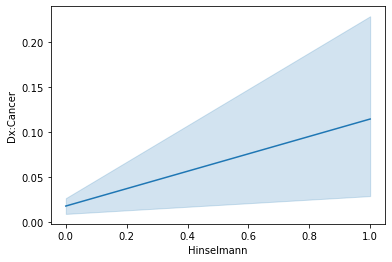

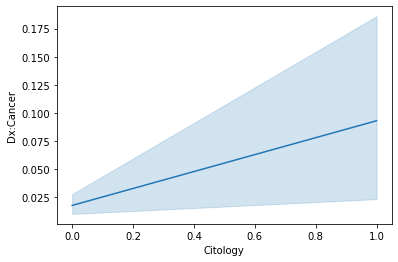

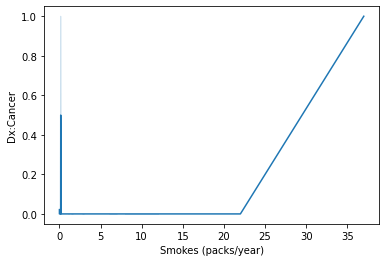

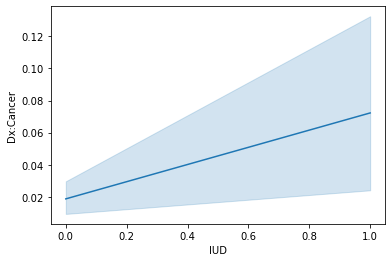

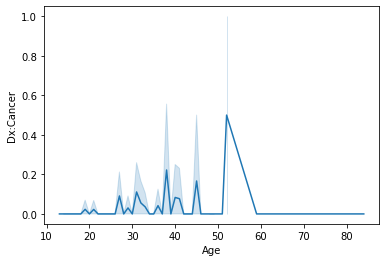

In [21]:
for i in columns:
    sns.lineplot(df[i],df["Dx:Cancer"],data=df)
    plt.show()
    

In [22]:
df.isnull().sum()

Age                                     0
Number of sexual partners              25
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               103
Hormonal Contraceptives (years)       103
IUD                                   112
IUD (years)                           112
STDs                                  100
STDs (number)                         100
STDs:condylomatosis                   100
STDs:cervical condylomatosis          100
STDs:vaginal condylomatosis           100
STDs:vulvo-perineal condylomatosis    100
STDs:syphilis                         100
STDs:pelvic inflammatory disease      100
STDs:genital herpes                   100
STDs:molluscum contagiosum            100
STDs:AIDS                             100
STDs:HIV                              100
STDs:Hepatitis B                  

### Remove the two columns STDs: Time since first diagnosis and STDs: Time since last diagnosis

In [23]:
df.drop(["STDs: Time since first diagnosis","STDs: Time since last diagnosis"],inplace =True,axis =1)

In [24]:
df.shape

(835, 34)

# split data 

In [26]:
x =df.drop(["Dx:Cancer"],axis =1)
y =df["Dx:Cancer"]

### cleanind and normalizaion data 

In [27]:
enc = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')),
])
X =pd.DataFrame(enc.fit_transform(x),columns =x.columns)

In [28]:
X.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,-1.064408,0.864230,-7.176970e-01,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.036911,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949
1,-1.418269,-0.926119,-1.072899e+00,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.036911,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949
2,0.822850,-0.926119,-4.119088e-16,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.036911,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949
3,2.946016,1.461013,-3.624949e-01,1.165568,2.383889,8.638075,16.202125,0.731157,0.183850,-0.360122,...,-0.036911,-0.052235,-0.293385,-0.104383,6.737128,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949
4,2.238294,0.267447,1.413516e+00,1.165568,-0.419483,-0.302993,-0.206583,0.731157,3.348752,-0.360122,...,-0.036911,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949


### concatenation data

In [30]:
DF =pd.concat([X,y],axis =1)

In [31]:
DF.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Dx:Cancer
0,-1.064408,0.864230,-7.176970e-01,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
1,-1.418269,-0.926119,-1.072899e+00,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
2,0.822850,-0.926119,-4.119088e-16,-0.896455,-0.419483,-0.302993,-0.206583,-1.367694,-0.607375,-0.360122,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0
3,2.946016,1.461013,-3.624949e-01,1.165568,2.383889,8.638075,16.202125,0.731157,0.183850,-0.360122,...,-0.052235,-0.293385,-0.104383,6.737128,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,1
4,2.238294,0.267447,1.413516e+00,1.165568,-0.419483,-0.302993,-0.206583,0.731157,3.348752,-0.360122,...,-0.052235,-0.293385,-0.104383,-0.148431,-0.172026,-0.209165,-0.309517,-0.233008,-0.262949,0


### save the data 

In [32]:
DF.to_csv(DF_EXPORT)